In [1]:
from utils.dataloader import DatasetLoader 
from utils.plot import plt_corr,plot_index

from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split , cross_val_score

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_path = "dataset/"
loader = DatasetLoader(dataset_path)

datasets = loader.load_all_pickle_dataset()
dataset_dict = loader.get_state_names(datasets[0])
print(dataset_dict)

blacklist_states = ['kansas', 'new mexico', 'california', 'arizona']

for idx in range(len(blacklist_states)):
    del dataset_dict[blacklist_states[idx]]

{'alabama': ['baldwin', 'calhoun', 'cherokee', 'coffee', 'covington', 'dale', 'dallas', 'elmore', 'escambia', 'geneva', 'henry', 'houston', 'lauderdale', 'lawrence', 'limestone', 'madison', 'mobile', 'monroe', 'shelby'], 'arizona': ['graham', 'maricopa', 'pinal', 'yuma'], 'arkansas': ['ashley', 'chicot', 'clay', 'craighead', 'crittenden', 'desha', 'drew', 'jefferson', 'lee', 'lincoln', 'mississippi', 'phillips', 'poinsett'], 'california': ['kings', 'merced', 'tulare'], 'georgia': ['appling', 'atkinson', 'baker', 'ben hill', 'berrien', 'bleckley', 'brooks', 'bulloch', 'burke', 'calhoun', 'candler', 'coffee', 'colquitt', 'cook', 'crisp', 'decatur', 'dodge', 'dooly', 'early', 'emanuel', 'grady', 'irwin', 'jeff davis', 'jefferson', 'jenkins', 'laurens', 'miller', 'mitchell', 'pierce', 'pulaski', 'randolph', 'screven', 'seminole', 'sumter', 'tattnall', 'terrell', 'thomas', 'tift', 'turner', 'webster', 'wilcox', 'worth'], 'kansas': ['pratt', 'sumner'], 'louisiana': ['catahoula', 'east carrol

In [3]:
full_df = loader.combine_datasets(datasets,dataset_dict,total_dataset_number=5)

In [35]:
full_df.head(50)

,Date,evi,lai,fpar,lst_day,lst_nigth,dayl,prcp,srad,tmax,...,Clay,Bulk density,Coarse fragments,Total Nitrogen,pH,CEC,SOC,OCD,OCS,yield
0,1900-04-15,0.310849,11.546470,45.162013,15083.440266,14397.592538,45896.016658,0.319848,427.239497,27.437770,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
1,1900-05-15,0.328404,12.507246,44.811690,15171.300404,14576.705072,48760.840971,4.875159,387.576621,29.670406,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
2,1900-06-15,0.186835,12.136800,44.564538,15101.516064,14620.126352,50272.138924,11.172403,310.082462,29.770382,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
3,1900-07-15,0.337602,11.587949,40.694987,15105.019305,14636.127627,49658.408145,7.419759,328.322165,31.307629,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
4,1900-08-15,0.429020,23.179714,66.186181,15012.753248,14827.422734,47196.632539,8.091435,349.853724,33.159170,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
5,1900-09-15,0.475267,20.246953,63.133876,15033.691619,14584.152217,43828.883448,2.943241,404.791831,30.427653,...,241.478909,218.091482,92.958904,52.015565,2617.824646,145.563338,4.973312,131.016430,38.137413,906.0
6,1900-04-15,0.336559,14.480028,50.533619,15032.168705,14410.282037,46254.087089,0.221124,445.857697,28.149444,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0
7,1900-05-15,0.373631,18.694851,54.850629,15211.355389,14562.766301,49508.886035,1.244099,450.403895,29.768192,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0
8,1900-06-15,0.379201,17.726920,50.421978,15036.464680,14673.432203,51233.509144,4.492070,379.360199,30.557649,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0
9,1900-07-15,0.465103,28.353424,67.117212,15205.223552,14696.176157,50532.337023,0.918325,425.552879,32.343371,...,393.967130,297.043527,100.792664,53.429210,1064.655667,116.217459,58.750118,153.173881,42.690185,983.0


In [32]:
full_df['evi'].values[6*i:6*i+6].reshape(1, -1)
#full_df['evi'].values[6:6+6].reshape(1, -1)

array([[0.336559, 0.373631, 0.379201, 0.465103, 0.459571, 0.343416]])

In [7]:
full_df['Date'] = pd.to_datetime(full_df['Date'], format = '%m-%d')


In [8]:
full_df.dtypes

Date                datetime64[ns]
evi                        float64
lai                        float64
fpar                       float64
lst_day                    float64
lst_nigth                  float64
dayl                       float64
prcp                       float64
srad                       float64
tmax                       float64
tmin                       float64
vp                         float64
ssm                        float64
susm                       float64
Sand                       float64
Silt                       float64
Clay                       float64
Bulk density               float64
Coarse fragments           float64
Total Nitrogen             float64
pH                         float64
CEC                        float64
SOC                        float64
OCD                        float64
OCS                        float64
yield                      float64
dtype: object

In [33]:
dynamic_cols

['evi',
 'lai',
 'fpar',
 'lst_day',
 'lst_nigth',
 'dayl',
 'prcp',
 'srad',
 'tmax',
 'tmin',
 'vp',
 'ssm',
 'susm']

In [41]:
cols = list(full_df.columns)
dynamic_cols = cols[1:14]
new_dynamic_cols = [f"{dyn}_{m}" for dyn in dynamic_cols for m in range(4, 10)]

new_df = pd.DataFrame(columns=new_dynamic_cols)

# Veri döngüsü
for i in range(0, len(full_df), 6):
    row = full_df.iloc[i:i+6,1:14].values.ravel()
    new_df = new_df.append(pd.Series(row, index=new_df.columns), ignore_index=True)

for i in range(13,len(cols)):
    new_df[cols[i]] = full_df[cols[i]]



evi_4    float64
evi_5    float64
evi_6    float64
evi_7    float64
evi_8    float64
          ...   
CEC      float64
SOC      float64
OCD      float64
OCS      float64
yield    float64
Length: 91, dtype: object


In [29]:
cols = list(full_df.columns)
dynamic_cols = cols[1:14]
months = ["4","5","6","7","8","9"]
new_dynamic_cols = [f"{dyn}_{m}" for dyn in dynamic_cols for m in months]

for idx,df_index in enumerate(len(full_df.index)): 
    for dyn in dynamic_cols:

        ft = df_index % 13
        dynmaic_feature_month[6*ft:6*ft+6].append(full_df[dyn].values[6*idx:6*idx+6].reshape(1, -1))

    full_df.iloc[_index]

new_columns = [f'{col}_{i}' for col in dynamic_cols for i in range(4, 10)]
new_df = pd.DataFrame(columns=new_columns)

for col in dynamic_cols:
    for i in range(4, 10):
        for df_index in len(full_df.index):
        new_col_name = f'{col}_{i}'
        new_df[new_col_name] = full_df[col]



print(new_dynamic_cols)

['evi_4', 'evi_5', 'evi_6', 'evi_7', 'evi_8', 'evi_9', 'lai_4', 'lai_5', 'lai_6', 'lai_7', 'lai_8', 'lai_9', 'fpar_4', 'fpar_5', 'fpar_6', 'fpar_7', 'fpar_8', 'fpar_9', 'lst_day_4', 'lst_day_5', 'lst_day_6', 'lst_day_7', 'lst_day_8', 'lst_day_9', 'lst_nigth_4', 'lst_nigth_5', 'lst_nigth_6', 'lst_nigth_7', 'lst_nigth_8', 'lst_nigth_9', 'dayl_4', 'dayl_5', 'dayl_6', 'dayl_7', 'dayl_8', 'dayl_9', 'prcp_4', 'prcp_5', 'prcp_6', 'prcp_7', 'prcp_8', 'prcp_9', 'srad_4', 'srad_5', 'srad_6', 'srad_7', 'srad_8', 'srad_9', 'tmax_4', 'tmax_5', 'tmax_6', 'tmax_7', 'tmax_8', 'tmax_9', 'tmin_4', 'tmin_5', 'tmin_6', 'tmin_7', 'tmin_8', 'tmin_9', 'vp_4', 'vp_5', 'vp_6', 'vp_7', 'vp_8', 'vp_9', 'ssm_4', 'ssm_5', 'ssm_6', 'ssm_7', 'ssm_8', 'ssm_9', 'susm_4', 'susm_5', 'susm_6', 'susm_7', 'susm_8', 'susm_9']


In [19]:
len(full_df.index)

6600

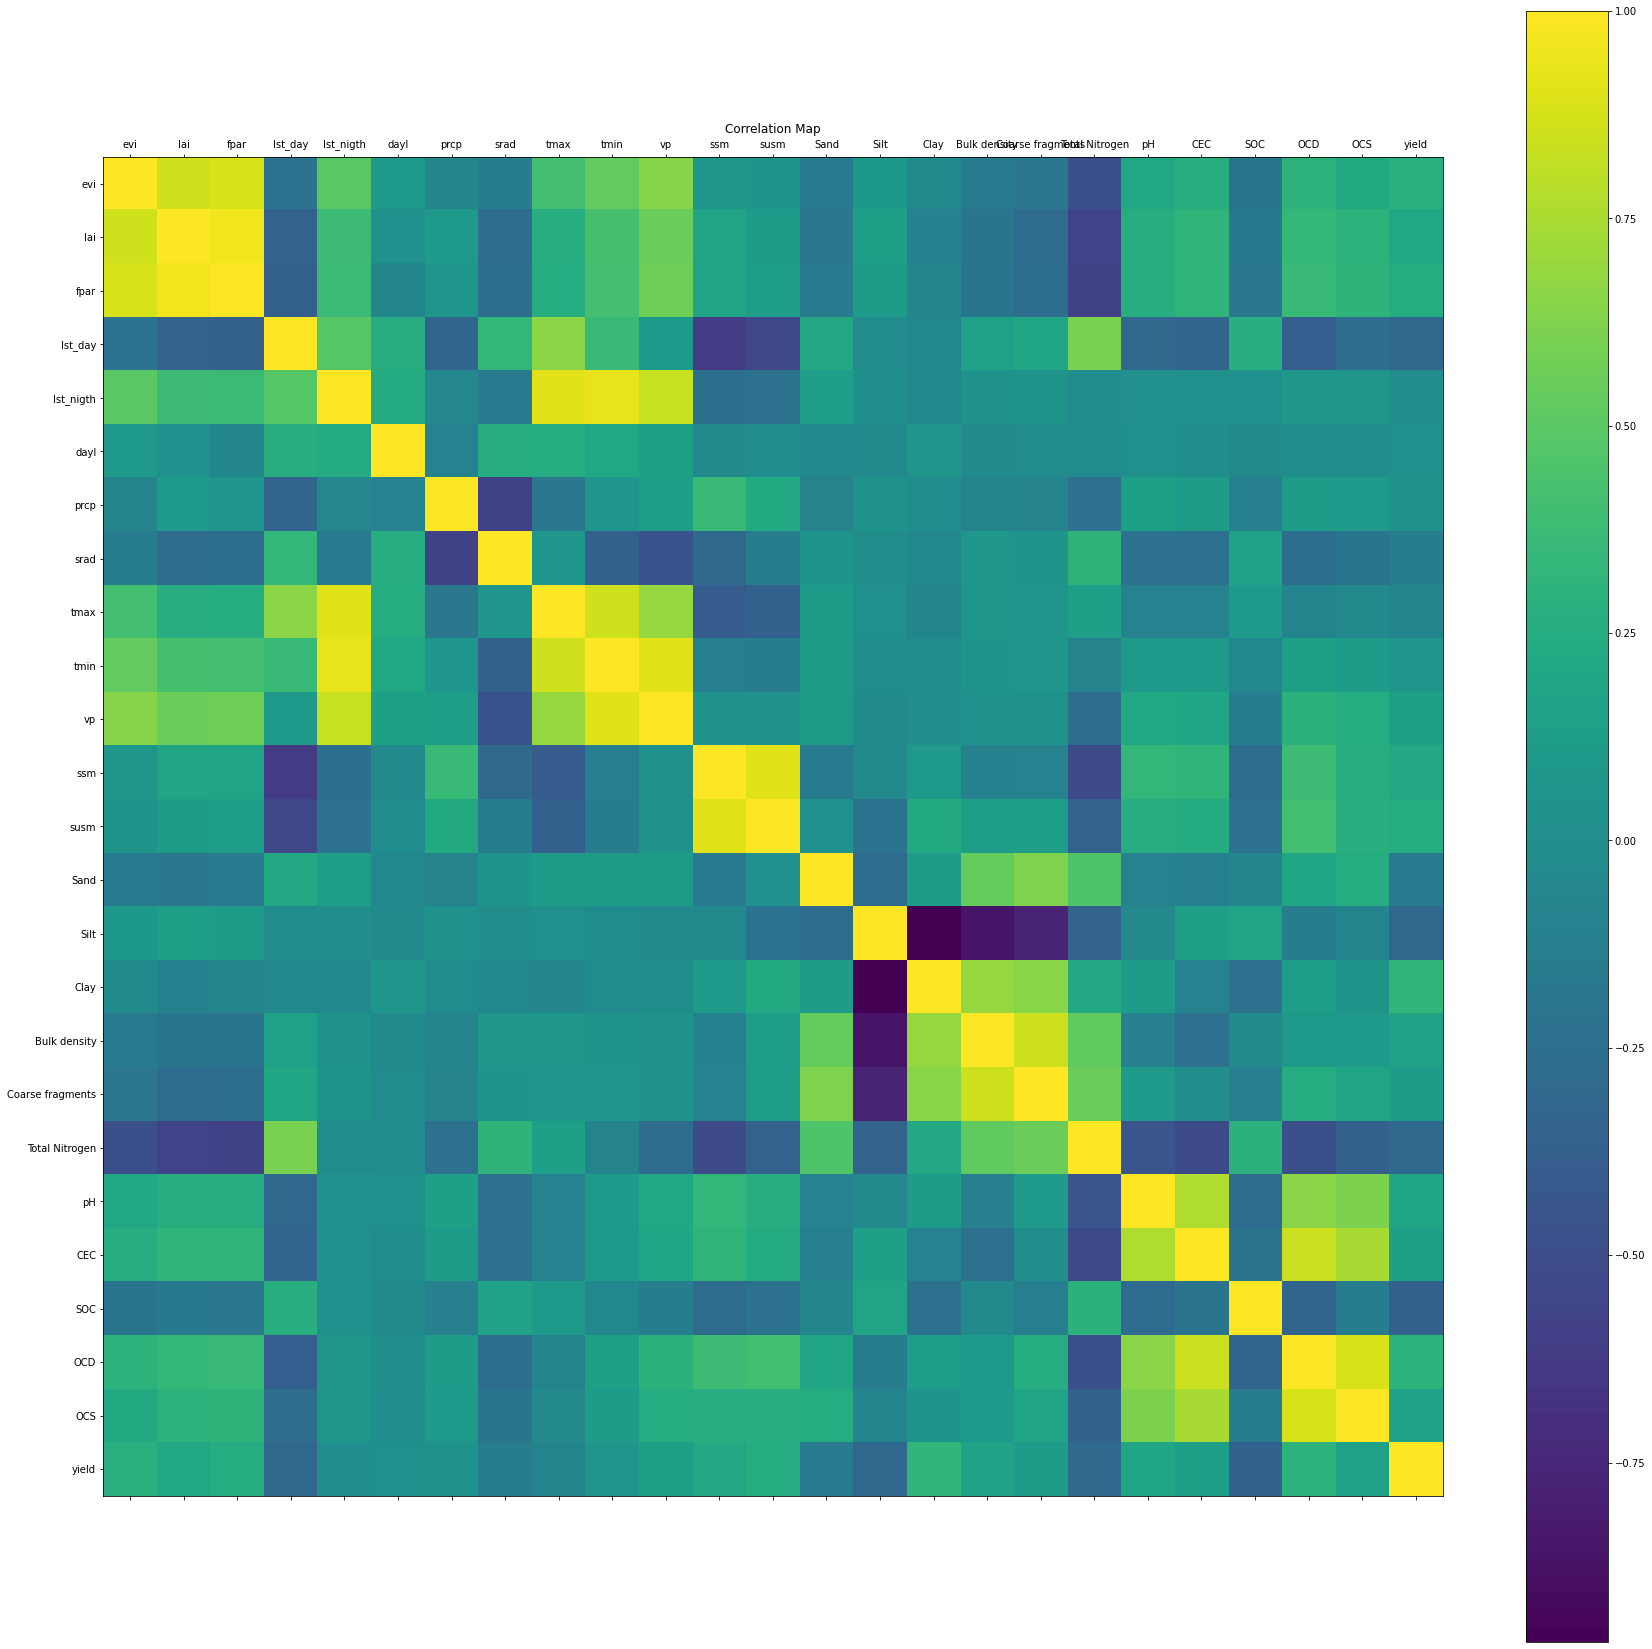

In [44]:
plt_corr(full_df.iloc[:, 1:],size=(30,30),save_fig=True, save_path= "results/corr_map.png")

## XGBoost

In [9]:
import xgboost as xgb
from matplotlib import pyplot as plt

In [45]:
target = 'yield'

#df_no_data_removed_ = full_df.drop('Date',axis=1)


X = new_df.drop(target,axis=1)

y = new_df[target]

#  convert the dataset into an optimized data structure called Dmatrix that XGBoost supports 
data_dmatrix = xgb.DMatrix(data=X,label=y) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34) 

# fit model no training data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror') 
xg_reg.fit(X_train,y_train) 
# plot feature importance


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

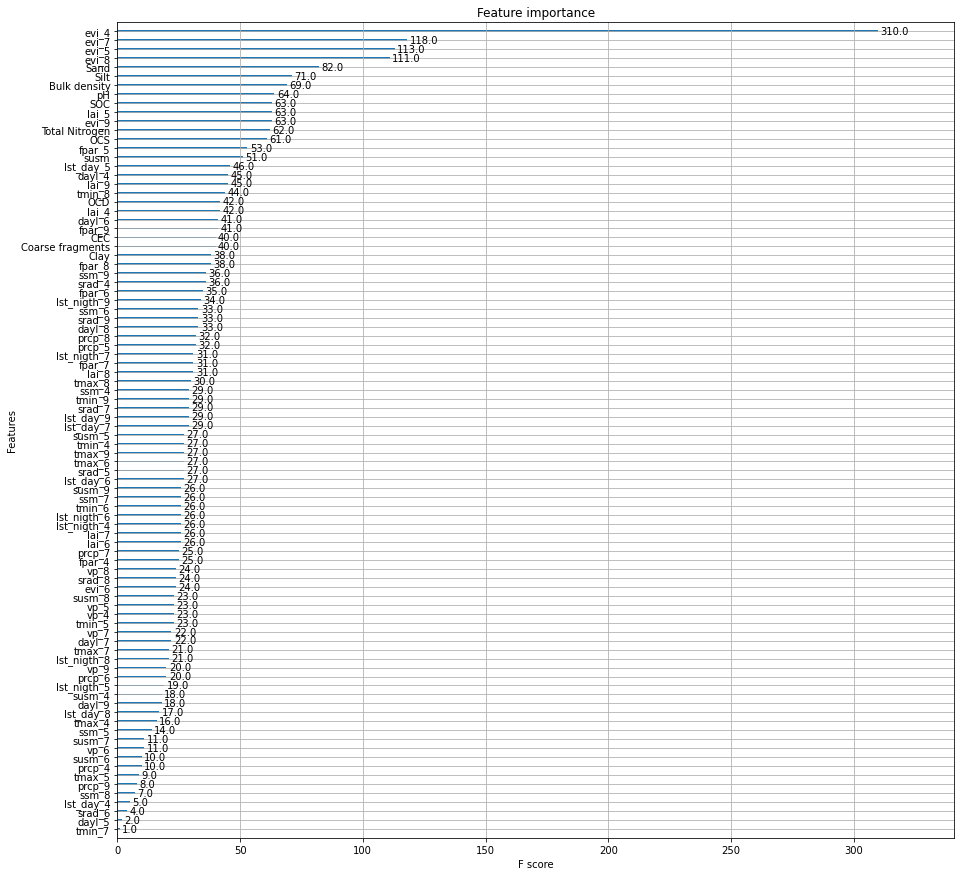

In [46]:
xgb.plot_importance(xg_reg) 
plt.rcParams['figure.figsize'] = [15, 15] 
plt.show()

## SHAP

In [47]:
import shap

In [48]:
# Fits the explainer
explainer = shap.Explainer(xg_reg.predict, X_train)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)


Permutation explainer: 221it [00:15,  4.99it/s]                         


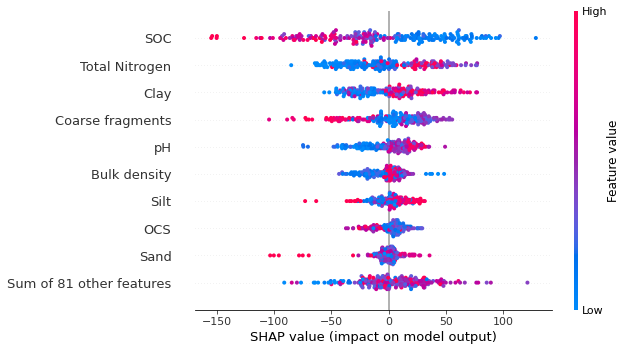

In [49]:
shap.plots.beeswarm(shap_values)

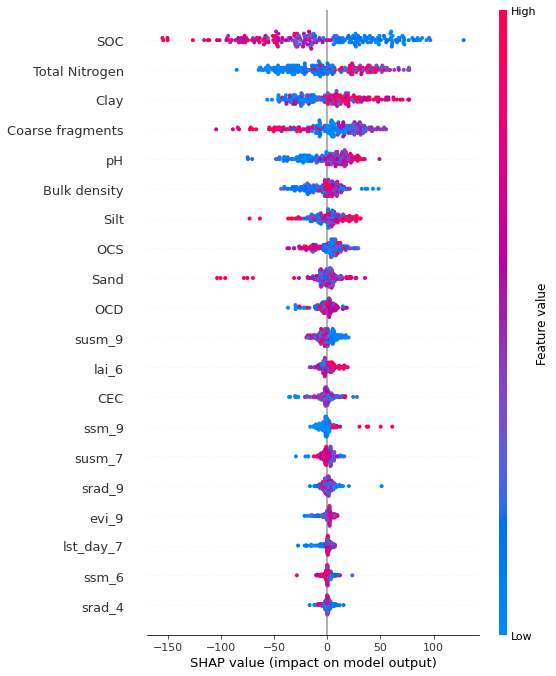

In [50]:
shap.summary_plot(shap_values, X_test)

In [52]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)


AttributeError: 'Permutation' object has no attribute 'expected_value'